#**Credit scoring model using logistic regression**


 Sample Data:
    Age  Income   Debt  Payment_History  Credit_Utilization  Default  \
0   59   36727  15399                2                0.42        0   
1   49   54304  16739                3                0.68        0   
2   35   52477  10957                2                0.72        0   
3   63   58534  13423                3                0.19        0   
4   28   36877  12866                3                0.10        0   

   Debt_to_Income  
0            0.42  
1            0.31  
2            0.21  
3            0.23  
4            0.35  

 Confusion Matrix:
 [[155   7]
 [ 18  20]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       162
           1       0.74      0.53      0.62        38

    accuracy                           0.88       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.87      0.88      0.87       200


 ROC-AUC Score: 0.88

 Feature Coeffici

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


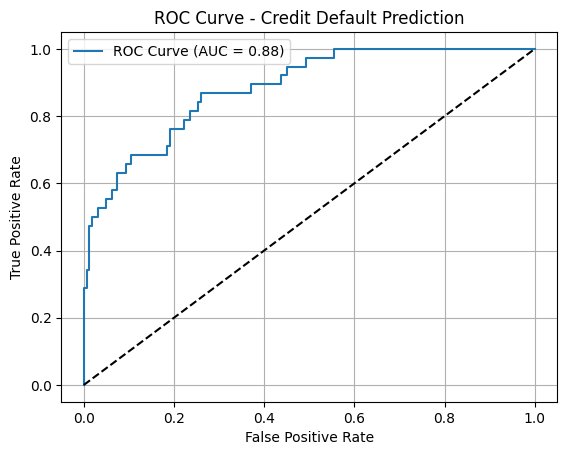

In [ ]:
# -----------------------------------------------
# CREDIT RISK SCORING USING LOGISTIC REGRESSION
# -----------------------------------------------

#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


np.random.seed(42)
n = 1000  # number of applicants

# Create synthetic financial features
age = np.random.randint(21, 65, size=n)
income = np.random.normal(50000, 15000, size=n).astype(int)
debt = np.random.normal(15000, 5000, size=n).astype(int)
payment_history = np.random.randint(0, 5, size=n)  # missed payments
credit_utilization = np.round(np.random.uniform(0.1, 0.9, size=n), 2)

# Generate binary target (default = 1, no default = 0)
# A person defaults if 2 or more risk flags are true
default = (
    (debt > 18000).astype(int) +
    (payment_history > 2).astype(int) +
    (credit_utilization > 0.7).astype(int)
)
default = (default > 1).astype(int)

# Create a pandas DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Debt': debt,
    'Payment_History': payment_history,
    'Credit_Utilization': credit_utilization,
    'Default': default
})

# Add Debt-to-Income Ratio
df['Debt_to_Income'] = (df['Debt'] / df['Income']).round(2)

# Preview the data
print("\n Sample Data:\n", df.head())

# -----------------------------------------------
#  STEP 2: Prepare Features and Target
# -----------------------------------------------

# Select features (independent variables)
X = df[['Income', 'Debt_to_Income', 'Credit_Utilization', 'Payment_History']]

# Target variable (dependent)
y = df['Default']

# -----------------------------------------------
#  STEP 3: Split Data into Train and Test Sets
# -----------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------
#  STEP 4: Train Logistic Regression Model
# -----------------------------------------------

model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------------------------------
#  STEP 5: Make Predictions
# -----------------------------------------------

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# -----------------------------------------------
#  STEP 6: Evaluate the Model
# -----------------------------------------------

# Confusion Matrix
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n ROC-AUC Score: {roc_auc:.2f}")

# -----------------------------------------------
# STEP 7: Understand Model Coefficients
# -----------------------------------------------

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\n Feature Coefficients:\n", coefficients)

# -----------------------------------------------
# STEP 8: Plot ROC Curve
# -----------------------------------------------

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Default Prediction")
plt.legend()
plt.grid(True)
plt.show()
